In [19]:
%matplotlib inline
import pysd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
model = pysd.read_vensim('C:/repos/Defence-Autonomy/model_wip.mdl')

In [29]:
stress_to_willingness_values = np.arange(1,3.1,0.5)
stress_to_willingness_values

array([1. , 1.5, 2. , 2.5, 3. ])

In [23]:
def run_results(params_dict):
    res = model.run(params_dict,
                return_columns=['Constrained Defence Spending', 
                                'Cumulative Defence Spending', 
                                'rate of orders fulfilled', 
                                'Cumulative Earnings'])
    
    return res

In [ ]:
# # Columns needed 
# columns = [
#     'Constrained Defence Spending',
#     'Cumulative Defence Spending',
#     'rate of orders fulfilled',
#     'Cumulative Earnings',
#     'stress_to_willingness'
# ]

Stress to willingness to spend only impacts
- Defence Spending 
- Cumulative Earnings

In [ ]:
control_dict = {}
results_list =[]

# loop over all possible stress values
for stress in stress_to_willingness_values:
    # each iteration gets a different stress value
    control_dict['stress to willingness'] = stress
    output_df = run_results(params_dict=control_dict) 
    output_df['stress_to_willingness'] = stress
    results_list.append(output_df)

willingness_to_spend_results_df = pd.concat(results_list)

In [50]:
willingness_to_spend_results_df.reset_index(inplace=True)

Shows how sensitive willingness to Defence Spending

<Axes: xlabel='time', ylabel='Cumulative Earnings'>

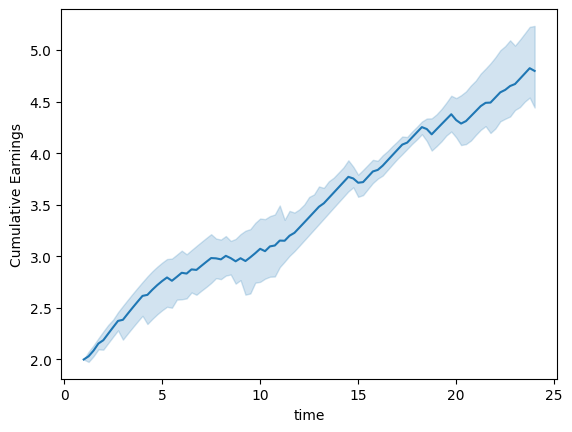

In [61]:
sns.lineplot(data=willingness_to_spend_results_df,
            x='time',
            y='Cumulative Earnings')

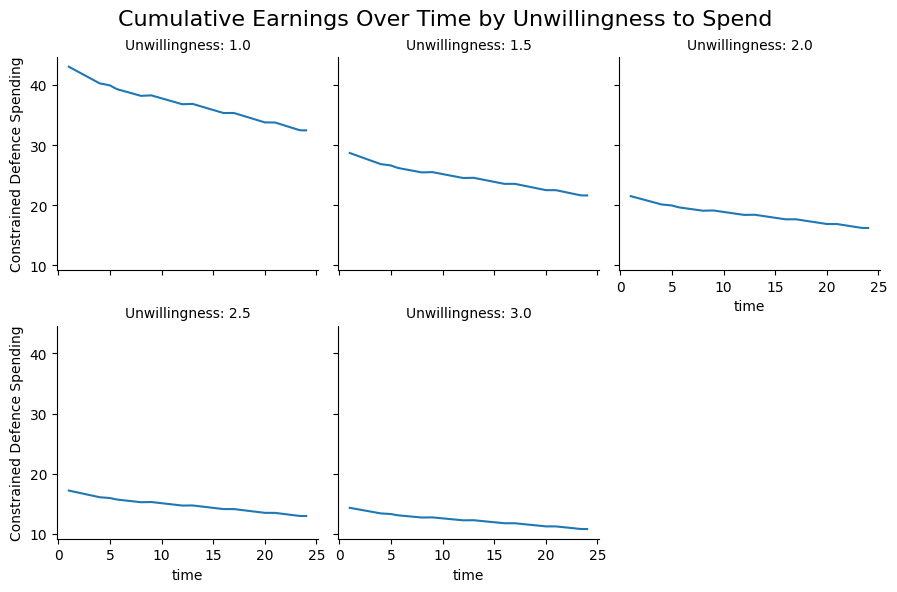

In [68]:
g = sns.FacetGrid(willingness_to_spend_results_df,
                  col='stress_to_willingness', 
                  col_wrap=3, sharey=True)
g.map(sns.lineplot, 'time', 'Constrained Defence Spending')
g.set_titles("Unwillingness: {col_name}")

# Add overall title
g.fig.suptitle("Cumulative Earnings Over Time by Unwillingness to Spend", fontsize=16)

# Adjust spacing to make room for the title
g.fig.subplots_adjust(top=0.9)  # Move the plots down to make space for the title

plt.show()


In [ ]:
# TESTING
# can we run multiple?
control_var = {'stress_to_willingness': 2, 'delay in delivery': 10}
results_list =[]

output_df = run_results(params_dict=control_var) 
output_df['stress_to_willingness'] = 2
output_df['delay_in_delivery'] = 10
    

In [24]:
control_var = {}
results_list =[]

for stress in stress_to_willingness_values:
    control_var['stress to willingness'] = stress
    output_df = run_results(params_dict=control_var) 
    output_df['stress_to_willingness'] = stress
    results_list.append(output_df)

all_results_df = pd.concat(results_list)

In [ ]:
values = model.run(return_columns=['Constrained Defence Spending', 'Cumulative Defence Spending', 'rate of orders fulfilled', 'Cumulative Earnings'])
values.head(5)

,Constrained Defence Spending,Cumulative Defence Spending,rate of orders fulfilled,Cumulative Earnings
time,,,,
1.00,21.515000,0.0000,2.520000,2.000000
1.25,21.399276,10.7575,2.520000,2.074970
1.50,21.283552,21.5150,2.521768,2.147001
1.75,21.167829,32.2725,2.524819,2.216141
2.00,21.052105,43.0300,2.528784,2.282420
